In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Autism spectrum disorder (ASD) Prediction"

One of the community competitions (this one) offered us the opportunity to see autism with data. Let's explore.

**The dataset**: The dataset is composed of survey results of people who filled an app form. There are labels portraying whether the person received a diagnosis of autism.

- **Objective**: Build machine learning models to predict the likelihood of having autism based on the given features.



### Part-1: EDA

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot



In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Hi/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Hi/test.csv")

In [ ]:
import numpy as np
from sklearn.utils import resample

# Assuming train and test are your original datasets

# Upsample training data to 8000 samples
train = resample(train, n_samples=10000, random_state=42)

# Upsample testing data to 2000 samples
test = resample(test, n_samples=2000, random_state=42)

# Display the shapes of the upsampled datasets
print("Upsampled Train Shape:", train.shape)
print("Upsampled Test Shape:", test.shape)


Upsampled Train Shape: (10000, 22)
Upsampled Test Shape: (2000, 21)


### Look at the head of the train

Below is the columns description of the datasets

- ID - ID of the patient
- A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
- age - Age of the patient in years
- gender - Gender of the patient
- ethnicity - Ethnicity of the patient
- jaundice - Whether the patient had jaundice at the time of birth
- autism - Whether an immediate family member has been diagnosed with autism
- contry_of_res - Country of residence of the patient
- used_app_before - Whether the patient has undergone a screening test before
- result - Score for AQ1-10 screening test
- age_desc - Age of the patient
- relation - Relation of patient who completed the test
- Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [ ]:
train.head(4)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
102,103,0,0,0,0,0,0,0,0,0,...,m,Black,no,no,India,no,7.566586,18 and more,Self,0
435,436,1,0,1,1,1,1,1,1,1,...,m,South Asian,yes,no,United States,no,13.231017,18 and more,Self,1
270,271,1,0,0,0,1,0,0,1,1,...,f,Hispanic,yes,no,United Kingdom,no,9.620736,18 and more,Self,0
106,107,0,0,0,0,0,0,0,1,0,...,m,?,yes,no,United Arab Emirates,no,5.095274,18 and more,Self,0


In [ ]:
train.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
22,23,0,0,0,0,0,0,1,1,0,...,f,Asian,no,no,United States,no,4.791004,18 and more,Self,0
557,558,0,0,0,1,0,0,0,1,0,...,m,White-European,no,no,India,no,6.020546,18 and more,Self,0
646,647,1,0,0,0,0,1,0,1,1,...,m,?,no,no,United States,no,11.909207,18 and more,Self,0
117,118,0,0,0,0,0,0,0,0,0,...,m,Middle Eastern,no,no,New Zealand,no,4.449270,18 and more,Self,0
700,701,1,1,0,1,1,0,0,1,1,...,f,White-European,yes,no,Mexico,no,8.176131,18 and more,Self,0


In [ ]:
train.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 102 to 700
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10000 non-null  int64  
 1   A1_Score         10000 non-null  int64  
 2   A2_Score         10000 non-null  int64  
 3   A3_Score         10000 non-null  int64  
 4   A4_Score         10000 non-null  int64  
 5   A5_Score         10000 non-null  int64  
 6   A6_Score         10000 non-null  int64  
 7   A7_Score         10000 non-null  int64  
 8   A8_Score         10000 non-null  int64  
 9   A9_Score         10000 non-null  int64  
 10  A10_Score        10000 non-null  int64  
 11  age              10000 non-null  int64  
 12  gender           10000 non-null  object 
 13  ethnicity        10000 non-null  object 
 14  jaundice         10000 non-null  object 
 15  austim           10000 non-null  object 
 16  contry_of_res    10000 non-null  object 
 17  used_app_before  

In [ ]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,399.856000,0.572400,0.291300,0.315900,0.415400,0.45720,0.205500,0.277700,0.720900,0.319100,0.45720,3.049000,7.076504,0.229200
std,230.596348,0.494755,0.454384,0.464897,0.492816,0.49819,0.404087,0.447887,0.448579,0.466151,0.49819,1.419296,3.769717,0.420339
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,-2.594654,0.000000
25%,199.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,4.534432,0.000000
50%,400.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,3.000000,6.895935,0.000000
75%,601.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.00000,4.000000,9.886210,0.000000
max,800.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,13.390868,1.000000


Look at the head of the test¶
Below is the columns description of the datasets

ID - ID of the patient
A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
age - Age of the patient in years
gender - Gender of the patient
ethnicity - Ethnicity of the patient
jaundice - Whether the patient had jaundice at the time of birth
autism - Whether an immediate family member has been diagnosed with autism
contry_of_res - Country of residence of the patient
used_app_before - Whether the patient has undergone a screening test before
result - Score for AQ1-10 screening test
age_desc - Age of the patient
relation - Relation of patient who completed the test

In [ ]:
test.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
102,103,1,0,1,1,1,1,1,1,1,...,1,f,Pasifika,no,yes,Canada,no,13.300173,18 and more,Self
179,180,0,1,0,0,0,0,0,1,1,...,1,m,Hispanic,no,no,Ethiopia,no,5.148542,18 and more,Self
92,93,1,0,0,0,1,0,1,1,0,...,5,f,Turkish,no,no,Philippines,no,11.159310,18 and more,Self
14,15,1,1,1,1,1,1,1,1,1,...,3,f,Hispanic,yes,no,Belgium,no,13.150653,18 and more,Self
106,107,1,0,0,0,0,0,0,0,0,...,4,f,South Asian,no,no,United Arab Emirates,no,3.824907,18 and more,?


In [ ]:
test.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
157,158,0,0,0,0,1,0,0,1,0,...,4,m,Pasifika,yes,no,United States,no,11.004167,18 and more,Self
160,161,0,0,0,0,0,0,0,0,0,...,2,m,Asian,no,no,New Zealand,no,4.124547,18 and more,Self
76,77,1,0,0,0,0,0,0,1,0,...,1,f,?,yes,no,Iran,no,7.313443,18 and more,Self
115,116,1,0,0,0,0,0,0,1,0,...,4,f,Latino,no,yes,France,no,6.070757,18 and more,Self
153,154,1,0,1,1,1,0,0,0,1,...,2,f,Asian,no,no,Romania,no,8.387335,18 and more,Self


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 102 to 153
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2000 non-null   int64  
 1   A1_Score         2000 non-null   int64  
 2   A2_Score         2000 non-null   int64  
 3   A3_Score         2000 non-null   int64  
 4   A4_Score         2000 non-null   int64  
 5   A5_Score         2000 non-null   int64  
 6   A6_Score         2000 non-null   int64  
 7   A7_Score         2000 non-null   int64  
 8   A8_Score         2000 non-null   int64  
 9   A9_Score         2000 non-null   int64  
 10  A10_Score        2000 non-null   int64  
 11  age              2000 non-null   int64  
 12  gender           2000 non-null   object 
 13  ethnicity        2000 non-null   object 
 14  jaundice         2000 non-null   object 
 15  austim           2000 non-null   object 
 16  contry_of_res    2000 non-null   object 
 17  used_app_before  2

In [ ]:
test.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,100.167500,0.549500,0.268000,0.345000,0.429000,0.469000,0.197500,0.280000,0.719500,0.315000,0.385500,2.799000,6.834397
std,58.070686,0.497668,0.443028,0.475487,0.495057,0.499163,0.398212,0.449111,0.449356,0.464632,0.486835,1.424294,3.969203
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.721289
25%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.224185
50%,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,7.120393
75%,151.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,9.737140
max,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,13.369400


In [ ]:
train['age']= [int(age) for age in train['age']]
test['age']= [int(age) for age in test['age']]

In [ ]:
import pandas as pd

# Assuming 'train' is your DataFrame
# Replace 'train' with your actual DataFrame name
numeric_columns = train.select_dtypes(include=['number']).columns
correlation_matrix = train[numeric_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  \
ID         1.000000 -0.004500  0.019939  0.007489  0.023348  0.021695   
A1_Score  -0.004500  1.000000  0.258734  0.296881  0.315527  0.351780   
A2_Score   0.019939  0.258734  1.000000  0.390958  0.371112  0.308896   
A3_Score   0.007489  0.296881  0.390958  1.000000  0.515856  0.451114   
A4_Score   0.023348  0.315527  0.371112  0.515856  1.000000  0.555536   
A5_Score   0.021695  0.351780  0.308896  0.451114  0.555536  1.000000   
A6_Score   0.015836  0.275991  0.372771  0.496075  0.460703  0.414053   
A7_Score   0.000597  0.202392  0.267361  0.354825  0.371736  0.395928   
A8_Score   0.047829  0.225117  0.197255  0.238669  0.305993  0.247945   
A9_Score   0.026847  0.305051  0.420917  0.533002  0.540897  0.492693   
A10_Score -0.044345  0.282397  0.342915  0.458886  0.441072  0.429419   
age        0.061925  0.005629  0.004073 -0.054685 -0.052982 -0.059975   
result     0.008741  0.320167  

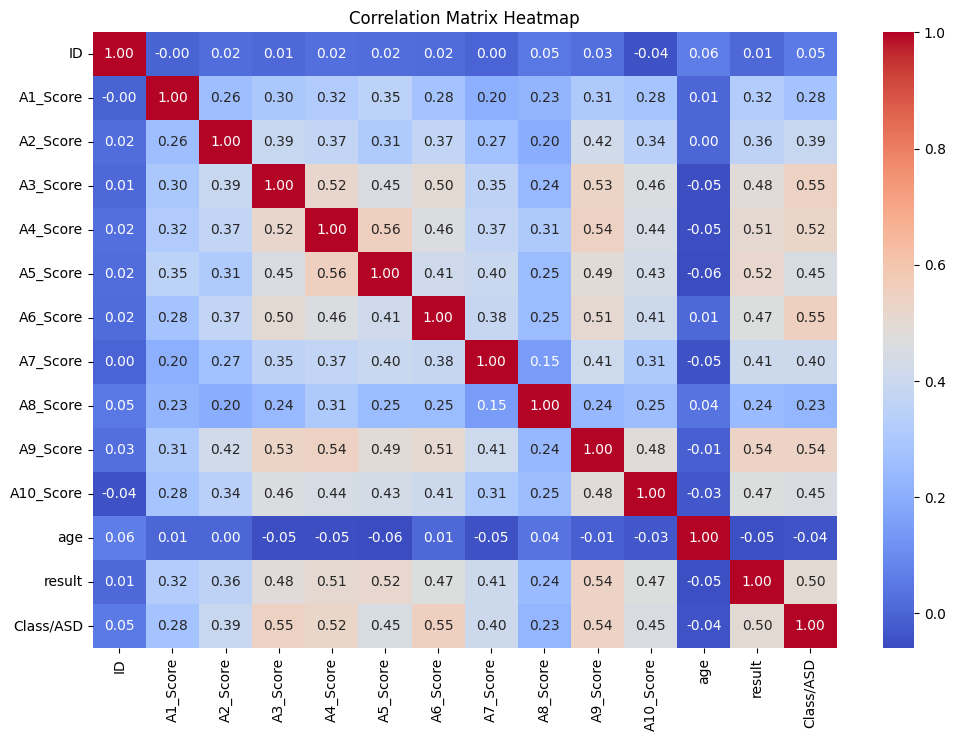

In [ ]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'df' with your actual DataFrame name
numeric_columns = train.select_dtypes(include=['number']).columns
correlation_matrix =train[numeric_columns].corr()

# Identify columns with low correlation
low_corr_cols = correlation_matrix.columns[correlation_matrix.abs().sum() < 0.1]

# Remove the identified columns from the dataset
df_filtered = train.drop(columns=low_corr_cols)

# Print the new dataset after removing the columns
print(df_filtered)


      ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
102  103         0         0         0         0         0         0   
435  436         1         0         1         1         1         1   
270  271         1         0         0         0         1         0   
106  107         0         0         0         0         0         0   
71    72         0         1         0         0         0         0   
..   ...       ...       ...       ...       ...       ...       ...   
22    23         0         0         0         0         0         0   
557  558         0         0         0         1         0         0   
646  647         1         0         0         0         0         1   
117  118         0         0         0         0         0         0   
700  701         1         1         0         1         1         0   

     A7_Score  A8_Score  A9_Score  ...  gender       ethnicity jaundice  \
102         0         0         0  ...       m           Bla

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 102 to 700
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10000 non-null  int64  
 1   A1_Score         10000 non-null  int64  
 2   A2_Score         10000 non-null  int64  
 3   A3_Score         10000 non-null  int64  
 4   A4_Score         10000 non-null  int64  
 5   A5_Score         10000 non-null  int64  
 6   A6_Score         10000 non-null  int64  
 7   A7_Score         10000 non-null  int64  
 8   A8_Score         10000 non-null  int64  
 9   A9_Score         10000 non-null  int64  
 10  A10_Score        10000 non-null  int64  
 11  age              10000 non-null  int64  
 12  gender           10000 non-null  object 
 13  ethnicity        10000 non-null  object 
 14  jaundice         10000 non-null  object 
 15  austim           10000 non-null  object 
 16  contry_of_res    10000 non-null  object 
 17  used_app_before  

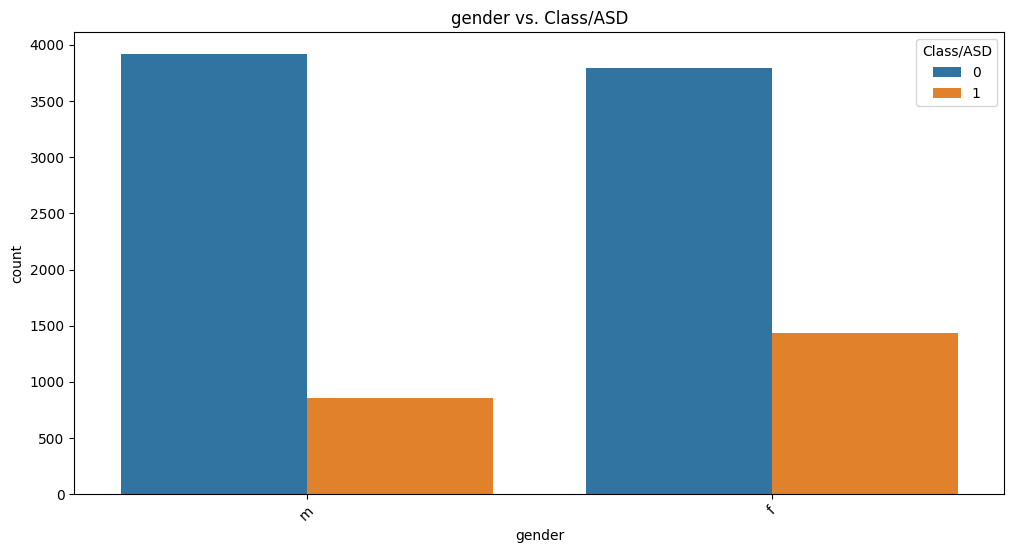

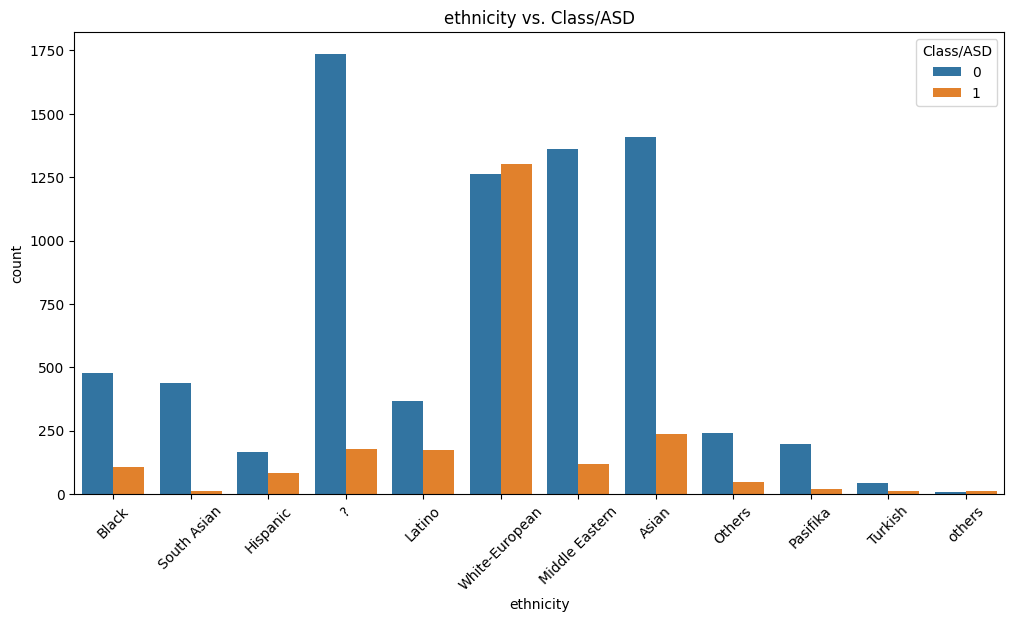

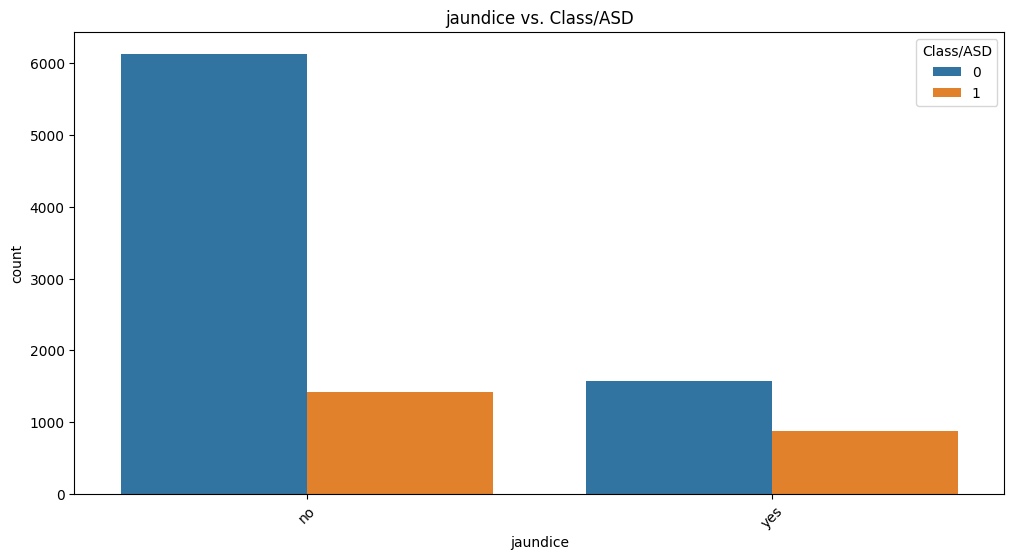

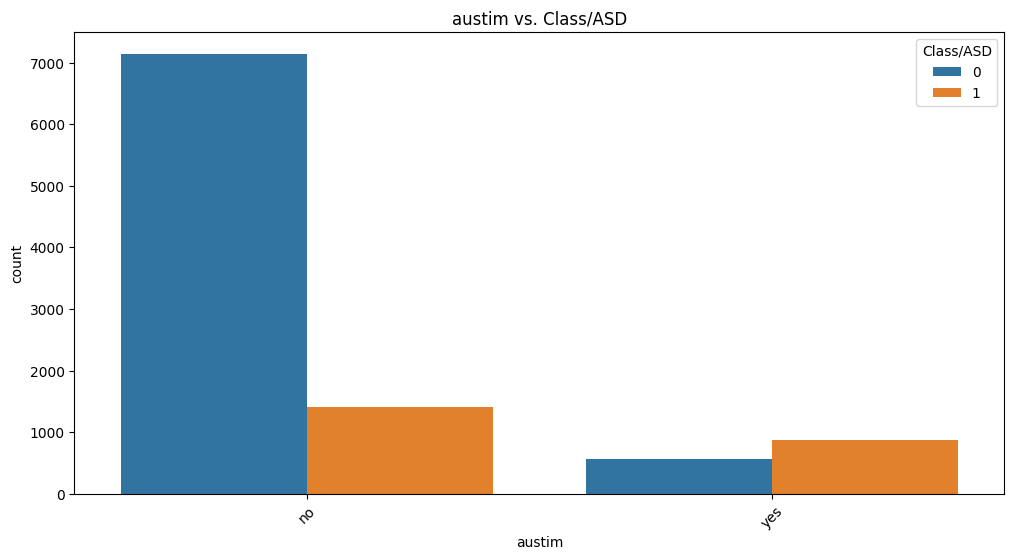

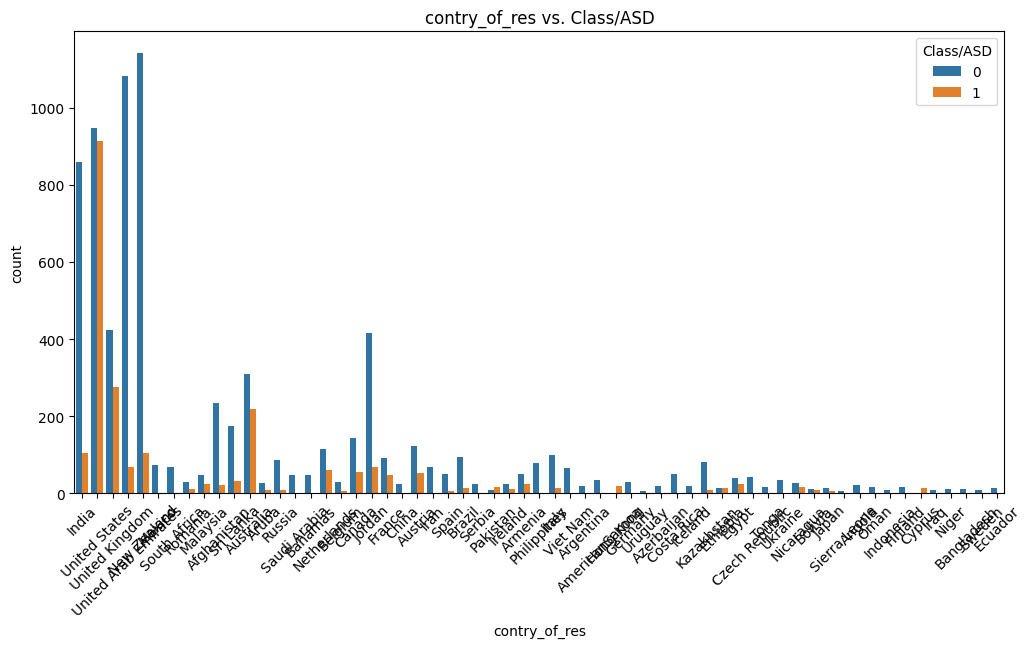

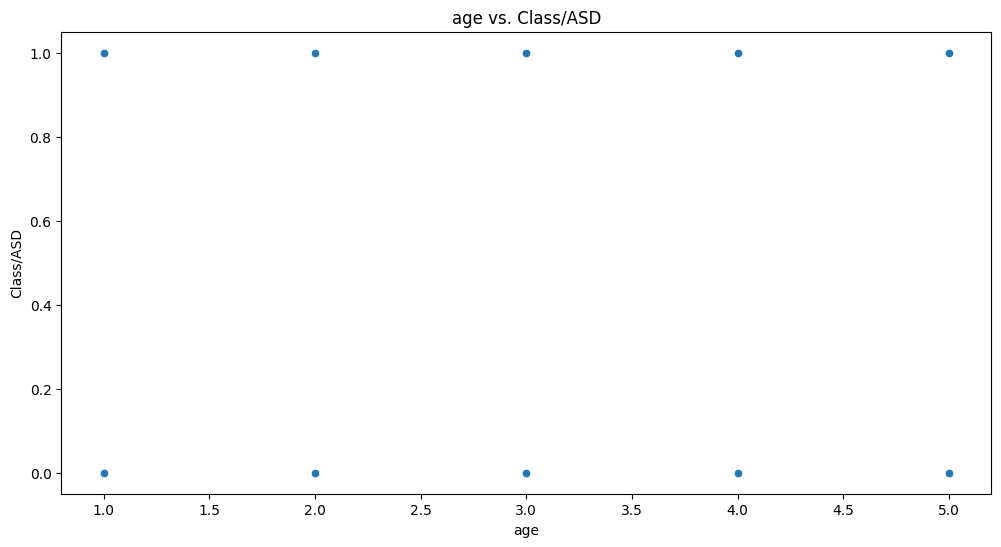

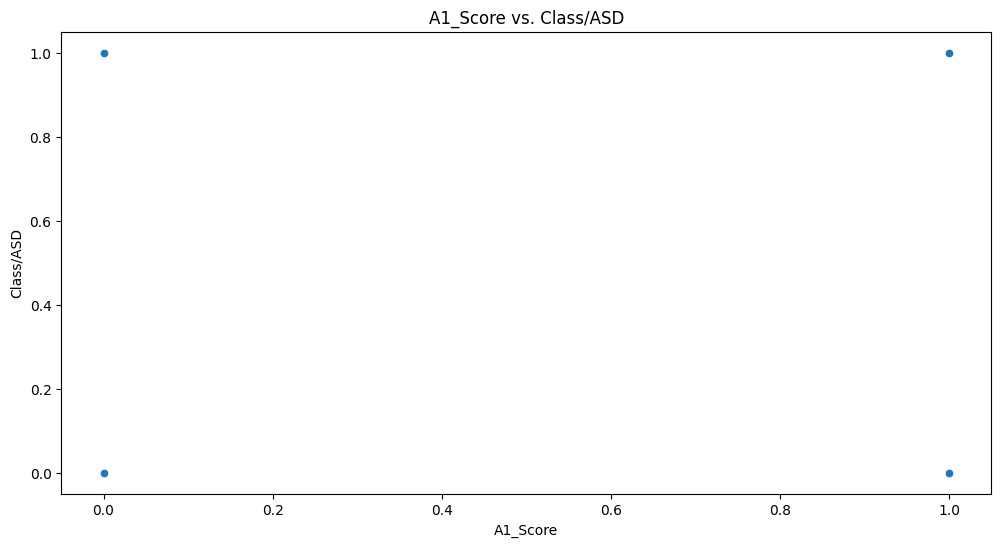

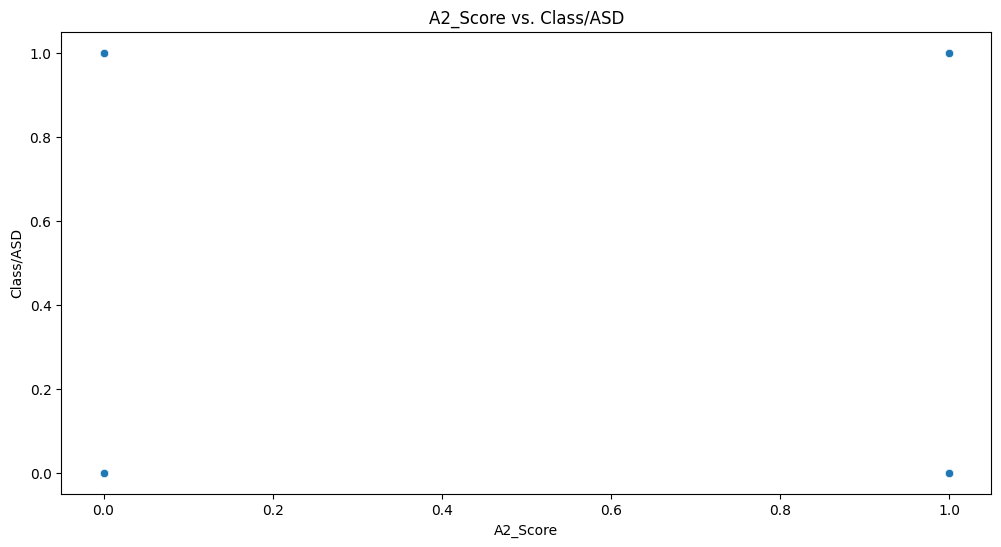

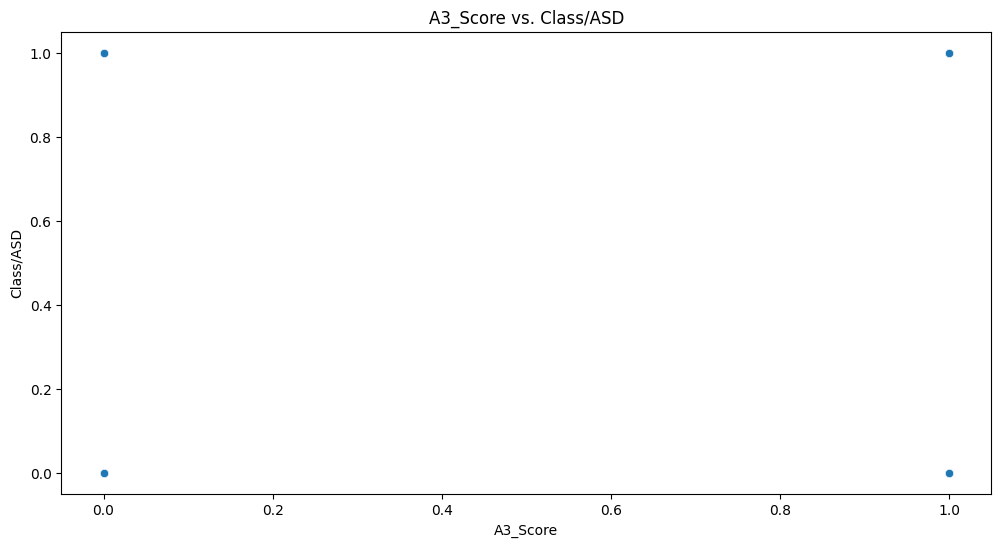

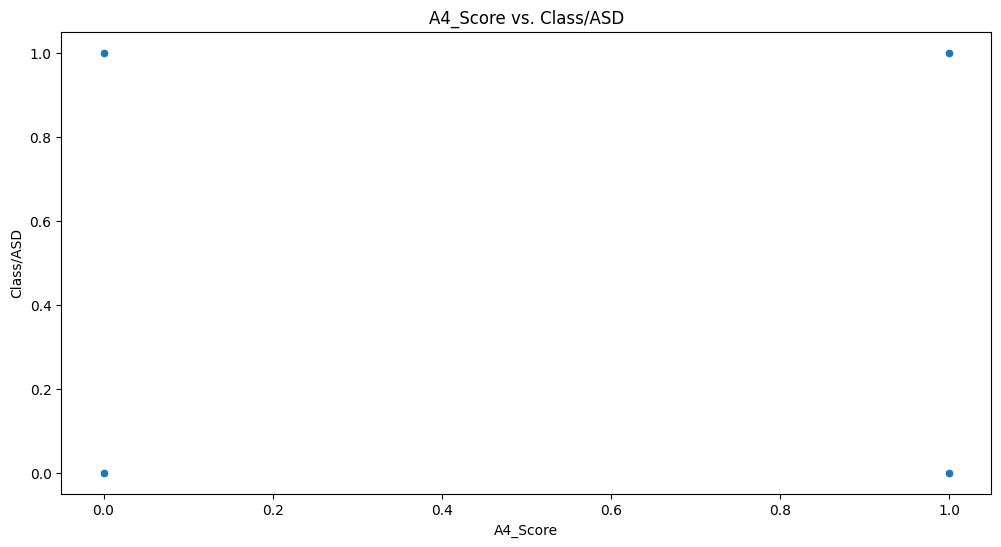

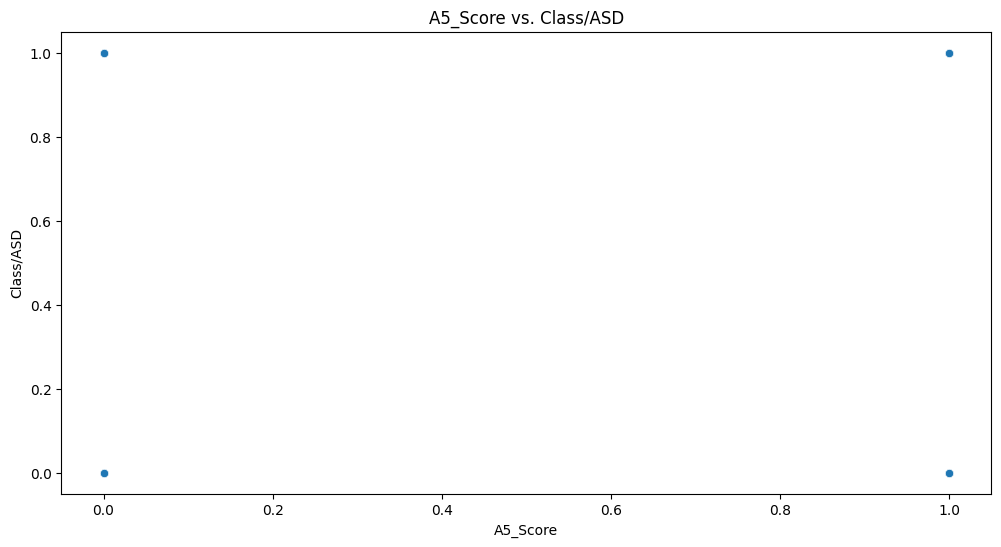

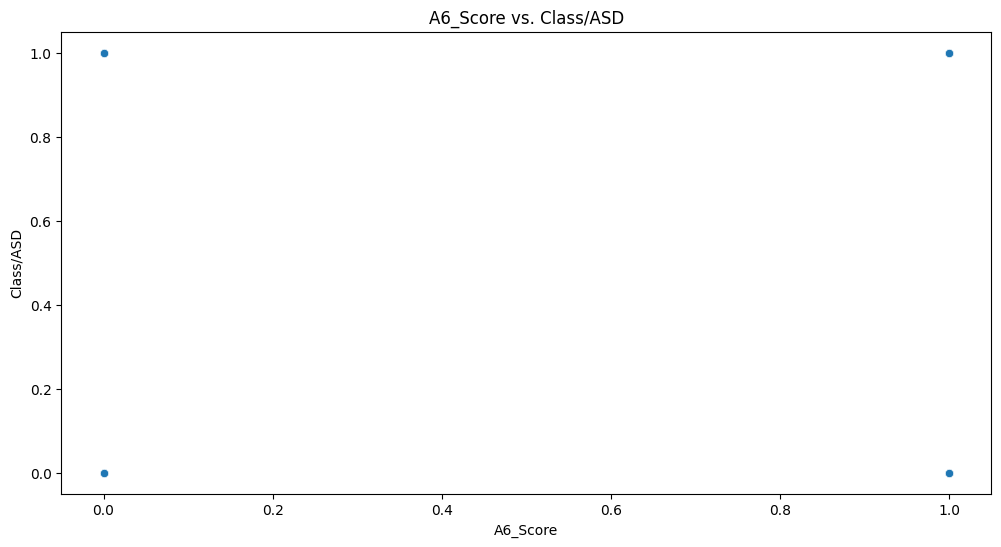

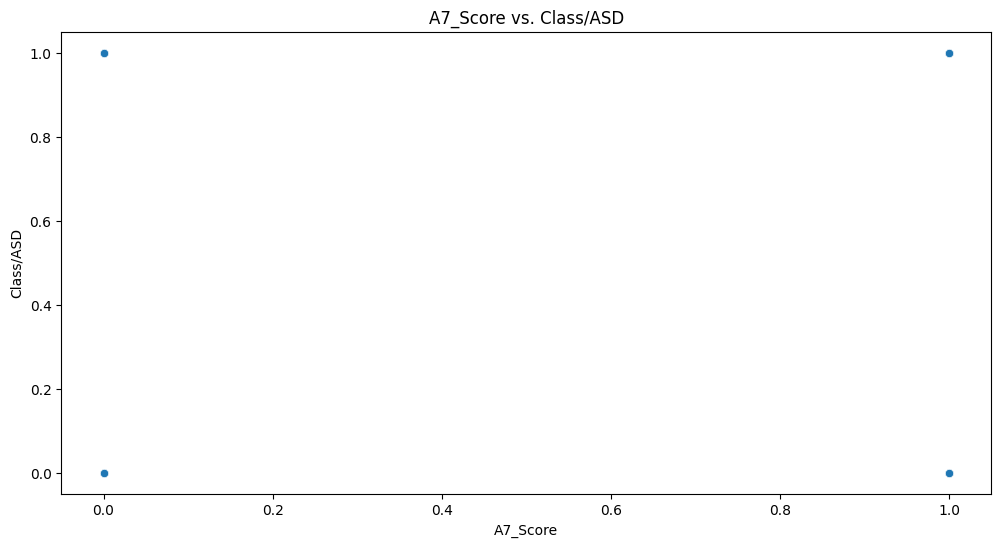

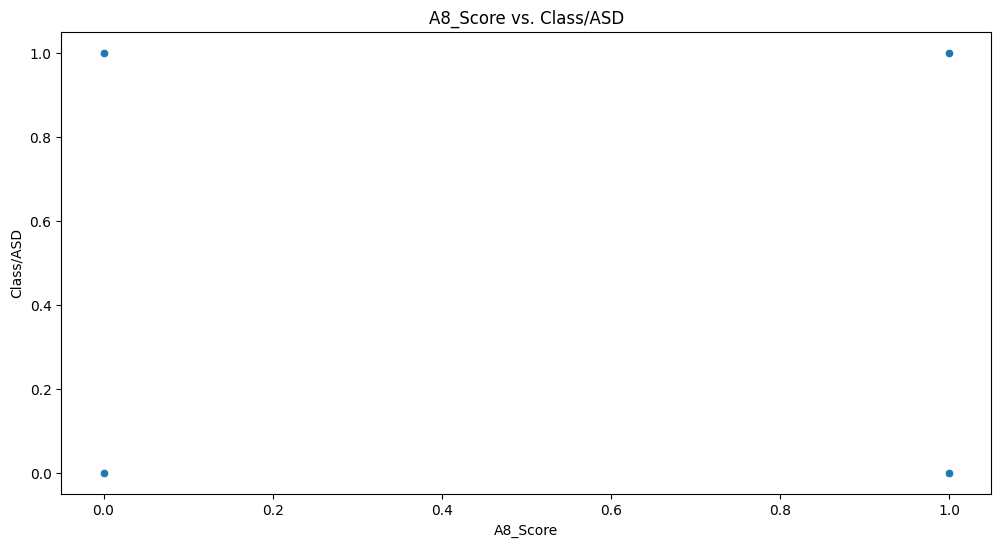

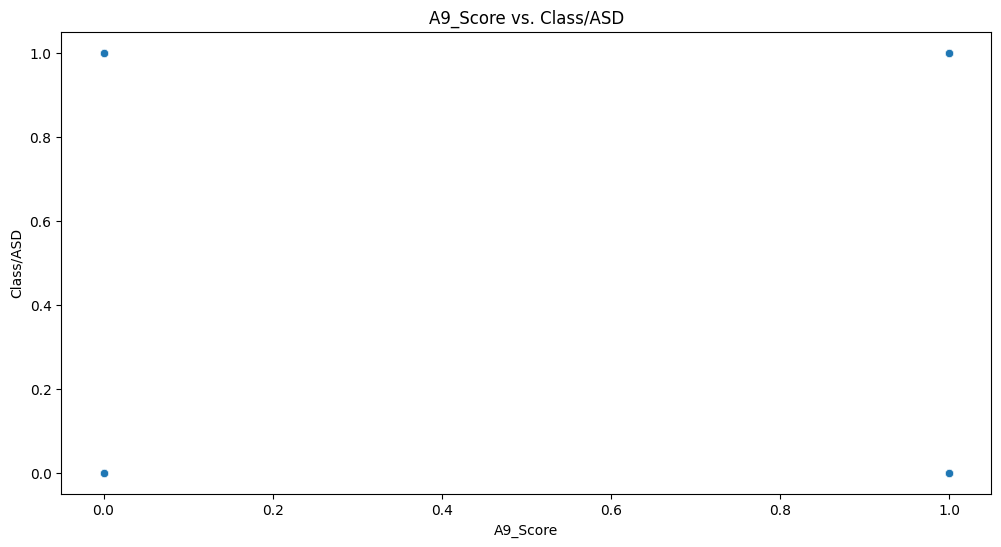

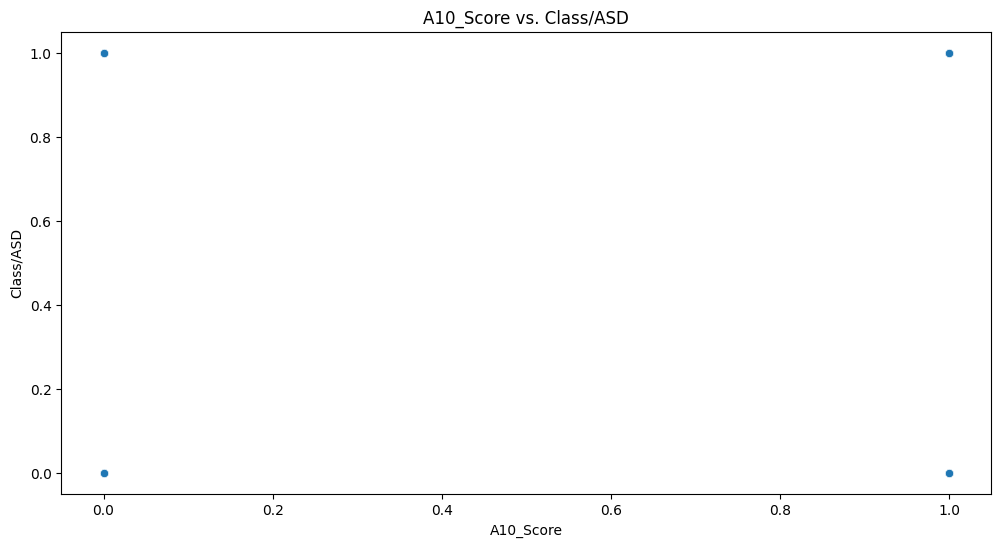

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame
# Replace 'train' with your actual DataFrame name

# Categorical features: Bar plots
categorical_features = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='Class/ASD', data=train)
    plt.title(f'{feature} vs. Class/ASD')
    plt.xticks(rotation=45)
    plt.legend(title='Class/ASD', loc='upper right')
    plt.show()

# Numerical features: Scatter plots
numerical_features = ['age','A1_Score',
    'A2_Score',
    'A3_Score' ,
    'A4_Score',
    'A5_Score',
    'A6_Score',
    'A7_Score',
    'A8_Score',
    'A9_Score',
'A10_Score' ]
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=feature, y='Class/ASD', data=train)
    plt.title(f'{feature} vs. Class/ASD')
    plt.show()


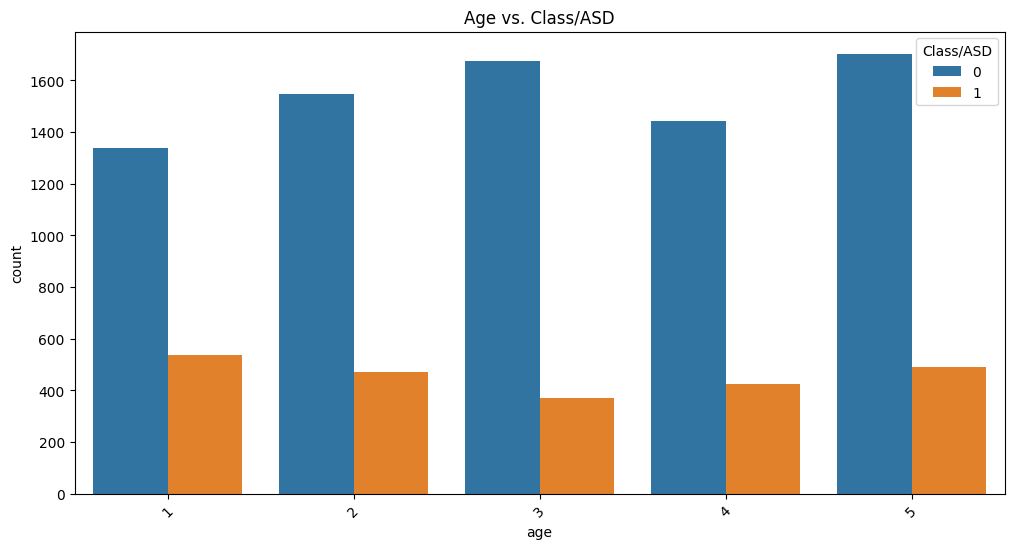

In [ ]:
train = train.drop(['used_app_before', 'result', 'relation', 'ID', 'age_desc'], axis=1)
test = test.drop(['used_app_before', 'result', 'relation', 'ID', 'age_desc'], axis=1)


### Null Values
- No null values in both train and test datasets

In [ ]:
display(train.isna().sum().sum())
display(test.isna().sum().sum())

0

0

### Some data cleaning

In [ ]:
# fix the spelling issue
train = train.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")
test = test.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")

# fix the other/Other capitalization
train['country_of_res'][train['country_of_res'] == 'others'] = 'Others'
test['country_of_res'][test['country_of_res'] == 'others'] = 'Others'

train['ethnicity'][train['ethnicity'] == 'others'] = 'Others'
test['ethnicity'][test['ethnicity'] == 'others'] = 'Others'

In [ ]:
cat_cols = [col for col in train.columns if train[col].dtype == 'object']
num_cols = [col for col in train.columns if train[col].dtype == 'int'][0:-1]



In [ ]:
train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'Class/ASD'],
      dtype='object')

In [ ]:
train['age'].unique()

array([4, 1, 3, 5, 2])

In [ ]:
for col in cat_cols:
  # Count unique values
  x = train[col].nunique()
  y = test[col].nunique()

  # Get unique values
  unique_train_values = train[col].unique()
  unique_test_values = test[col].unique()

  # Print results
  print("{}: train {} unique, test {} unique".format(col, x, y))
  print("Train unique values:", unique_train_values)
  print("Test unique values:", unique_test_values)
  print()  # Add an empty line for better readability between columns


gender: train 2 unique, test 2 unique
Train unique values: ['m' 'f']
Test unique values: ['f' 'm']

ethnicity: train 11 unique, test 11 unique
Train unique values: ['Black' 'South Asian' 'Hispanic' '?' 'Latino' 'White-European'
 'Middle Eastern' 'Asian' 'Others' 'Pasifika' 'Turkish']
Test unique values: ['Pasifika' 'Hispanic' 'Turkish' 'South Asian' 'Black' 'White-European'
 'Asian' '?' 'Others' 'Middle Eastern' 'Latino']

jaundice: train 2 unique, test 2 unique
Train unique values: ['no' 'yes']
Test unique values: ['no' 'yes']

autism: train 2 unique, test 2 unique
Train unique values: ['no' 'yes']
Test unique values: ['yes' 'no']

country_of_res: train 61 unique, test 44 unique
Train unique values: ['India' 'United States' 'United Kingdom' 'United Arab Emirates'
 'New Zealand' 'Mexico' 'South Africa' 'Romania' 'Malaysia' 'Afghanistan'
 'Sri Lanka' 'Australia' 'Aruba' 'Russia' 'Saudi Arabia' 'Bahamas'
 'Netherlands' 'Belgium' 'Canada' 'Jordan' 'France' 'China' 'Austria'
 'Iran' 'Spain

In [ ]:
label_encoder = LabelEncoder()
train_le = train.copy()
test_le = test.copy()

for col in cat_cols:
        train_le[col] = label_encoder.fit_transform(train[col])
        test_le[col] = label_encoder.fit_transform(test[col])

train = train_le
test = test_le

Class/ASD
0    7708
1    2292
Name: count, dtype: int64


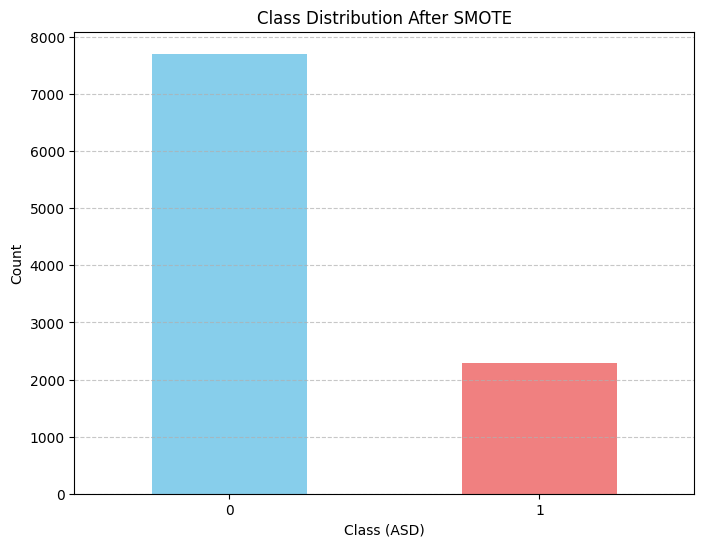

In [ ]:
class_counts = train['Class/ASD'].value_counts()
print(class_counts)

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])  # Colors for each class
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (ASD)")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming 'Class/ASD' is the target variable in your dataset train
# Separate the features (X) and target variable (y)
X_train = train.drop(columns=['Class/ASD'])
y_train = train['Class/ASD']

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Set sampling_strategy to 'auto' for 50:50 ratio
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Convert the balanced data back to DataFrame
X_train_balanced_df = pd.DataFrame(X_train_balanced, columns=X_train.columns)
y_train_balanced_series = pd.Series(y_train_balanced, name='Class/ASD')

# Concatenate X_train_balanced_df and y_train_balanced_series
train_balanced = pd.concat([X_train_balanced_df, y_train_balanced_series], axis=1)



Class/ASD
0    7708
1    7708
Name: count, dtype: int64


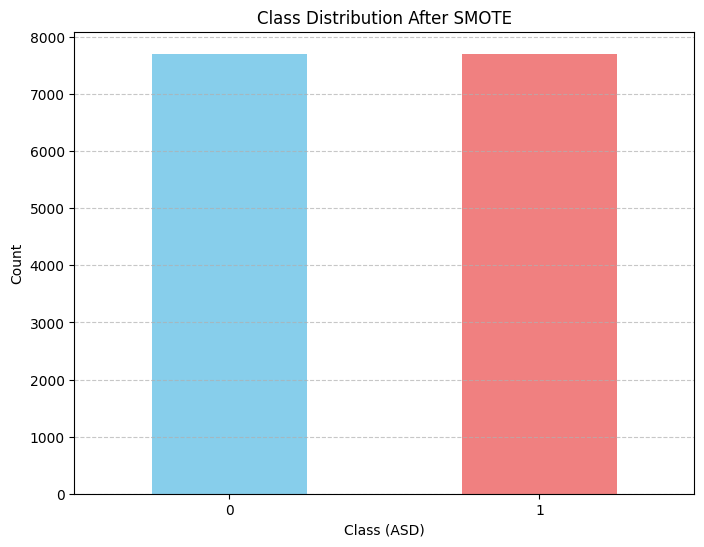

In [ ]:
class_counts = train_balanced['Class/ASD'].value_counts()
print(class_counts)

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])  # Colors for each class
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (ASD)")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.show()

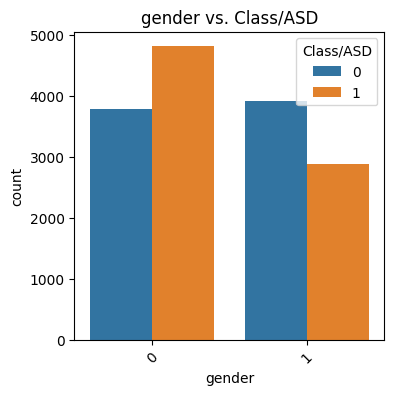

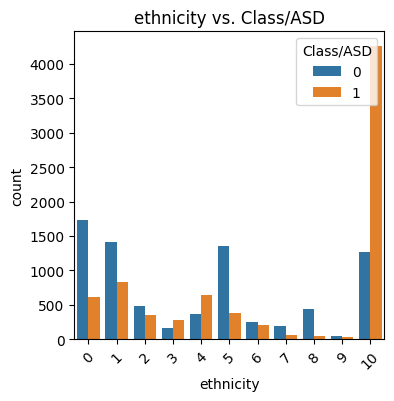

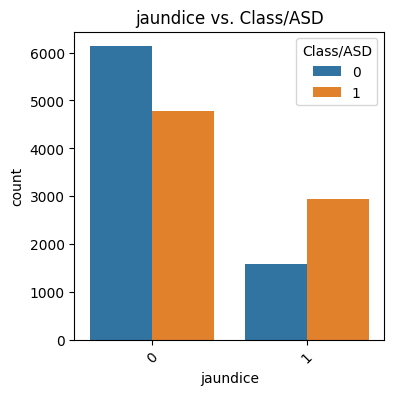

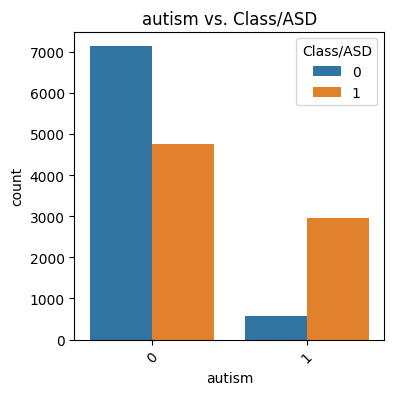

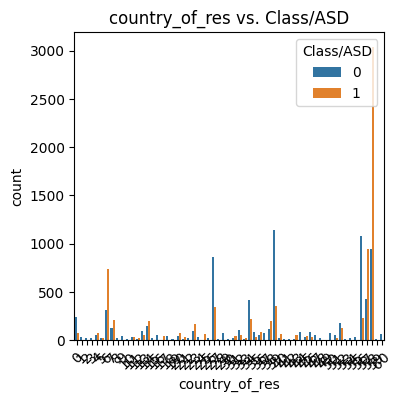

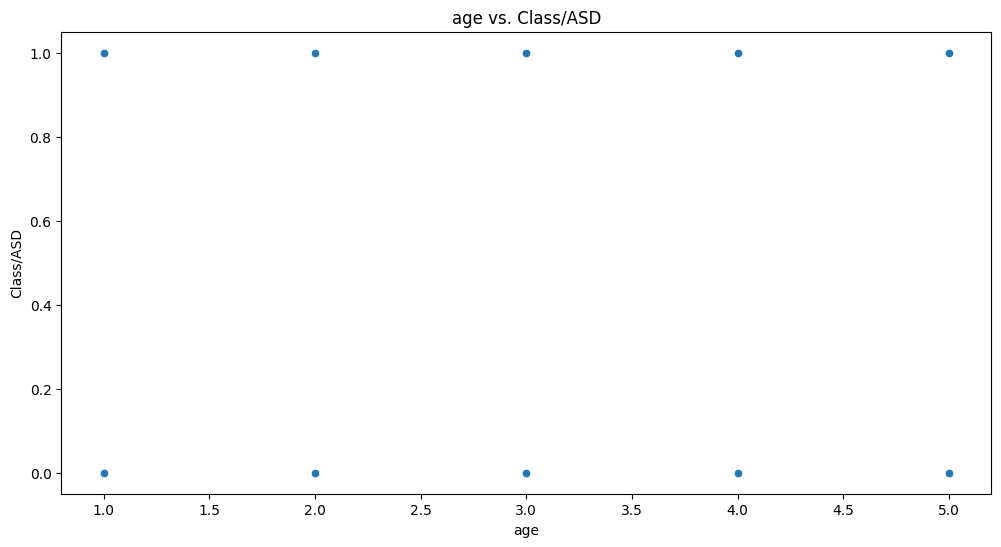

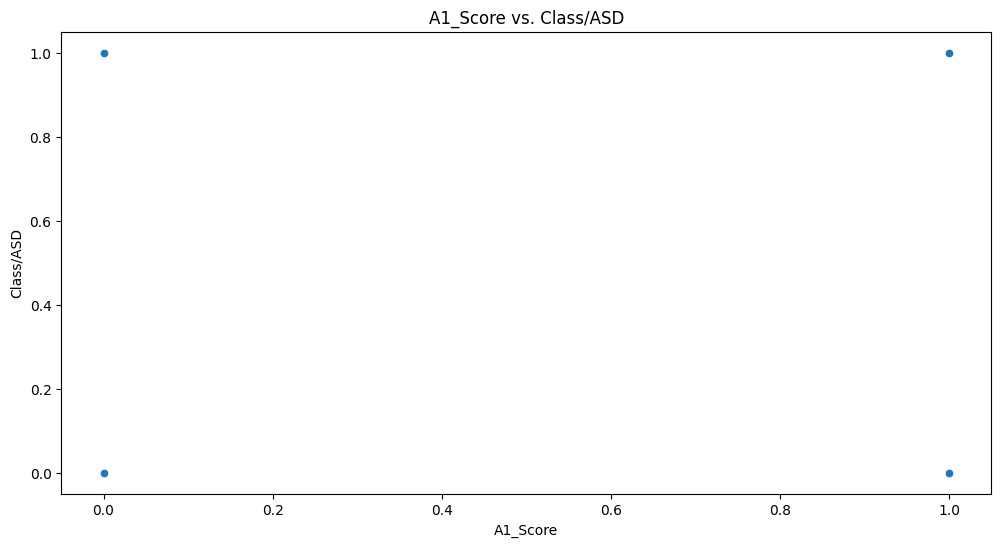

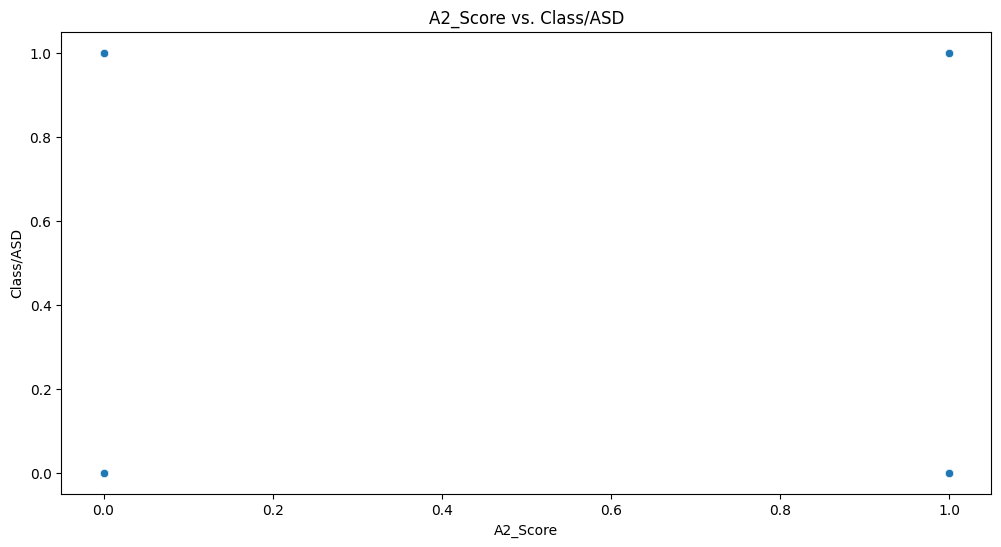

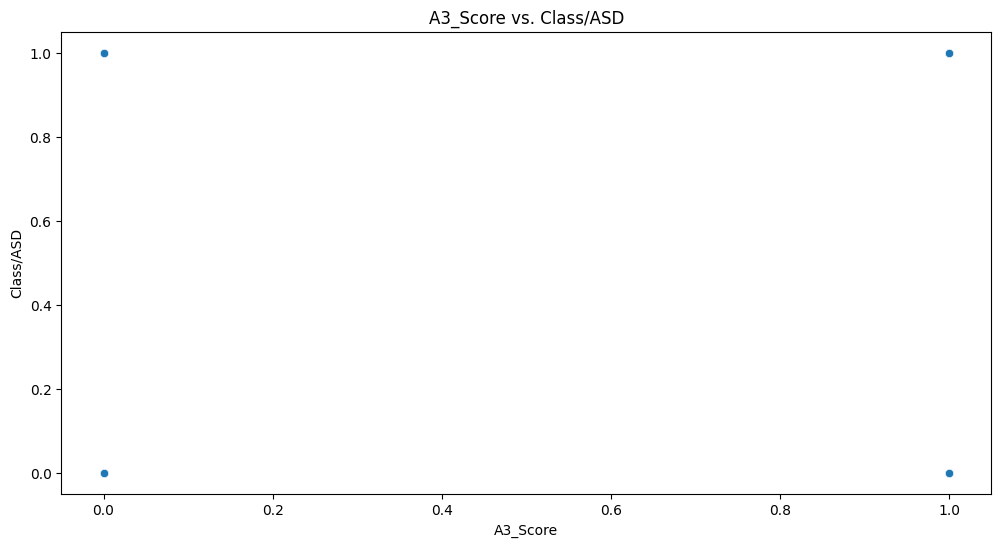

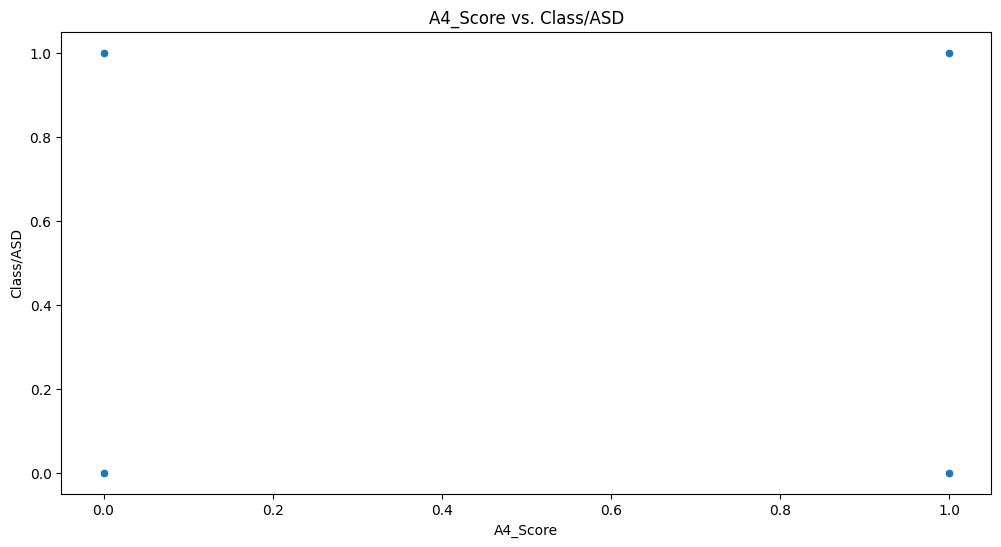

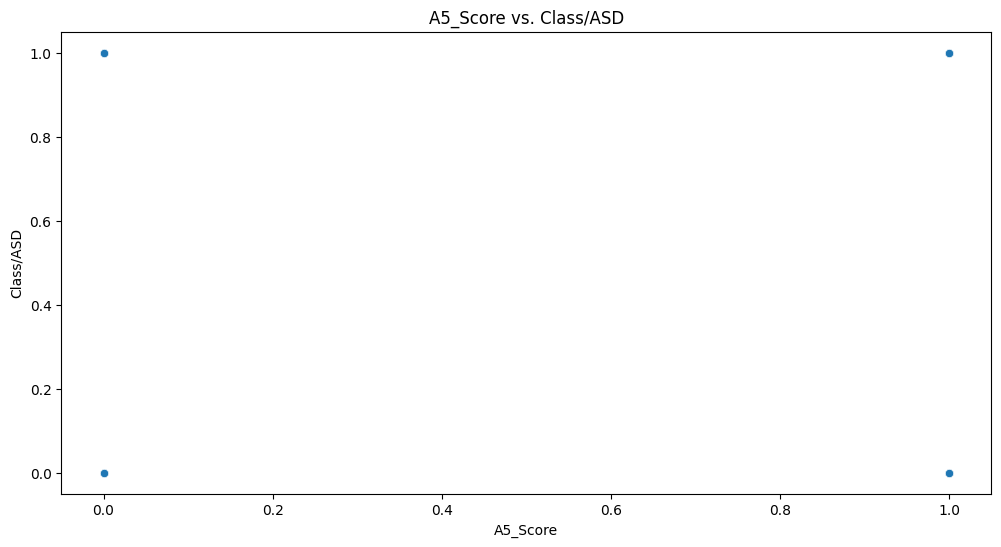

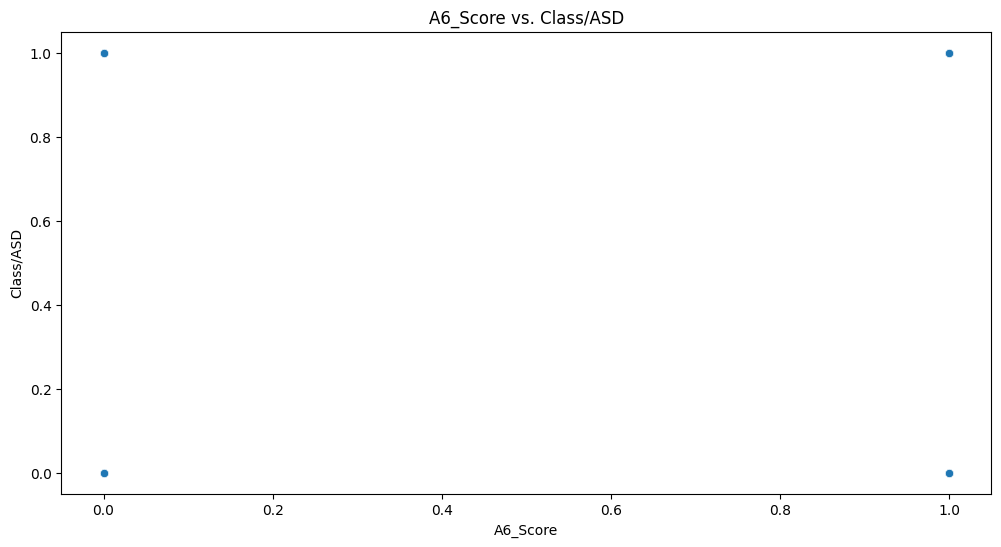

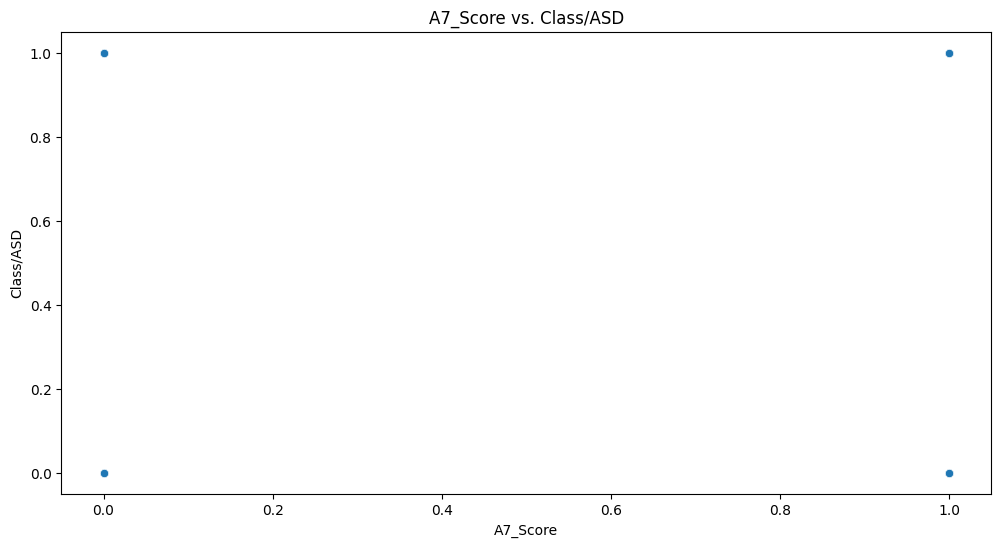

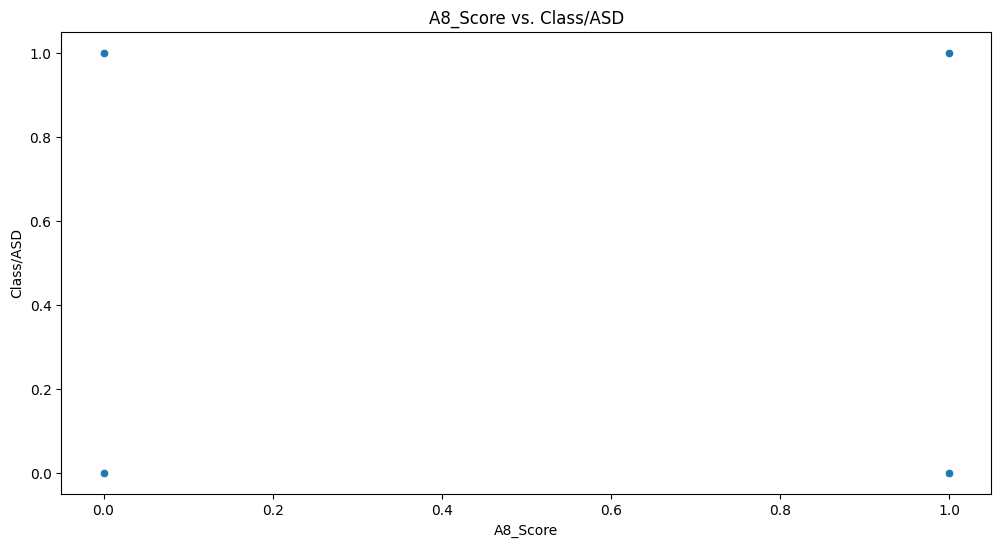

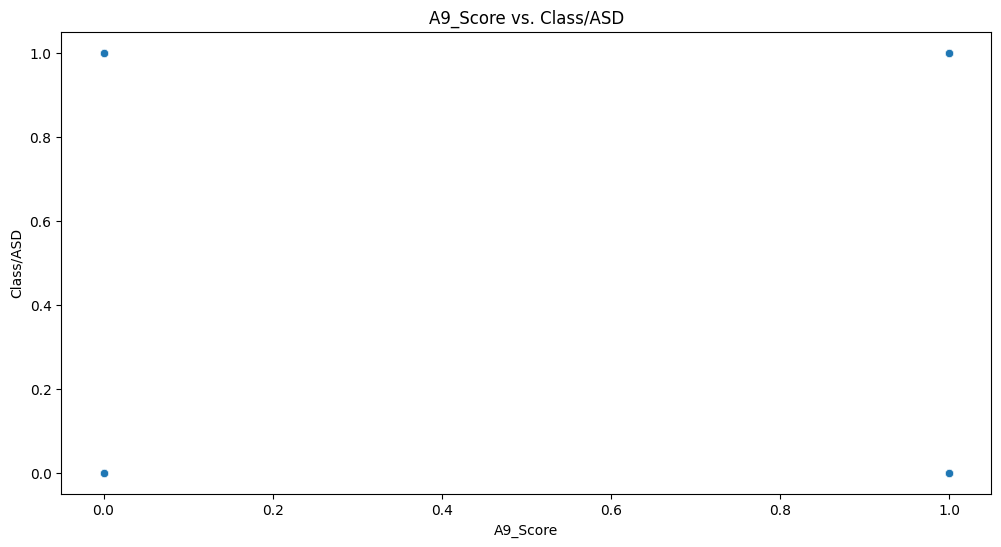

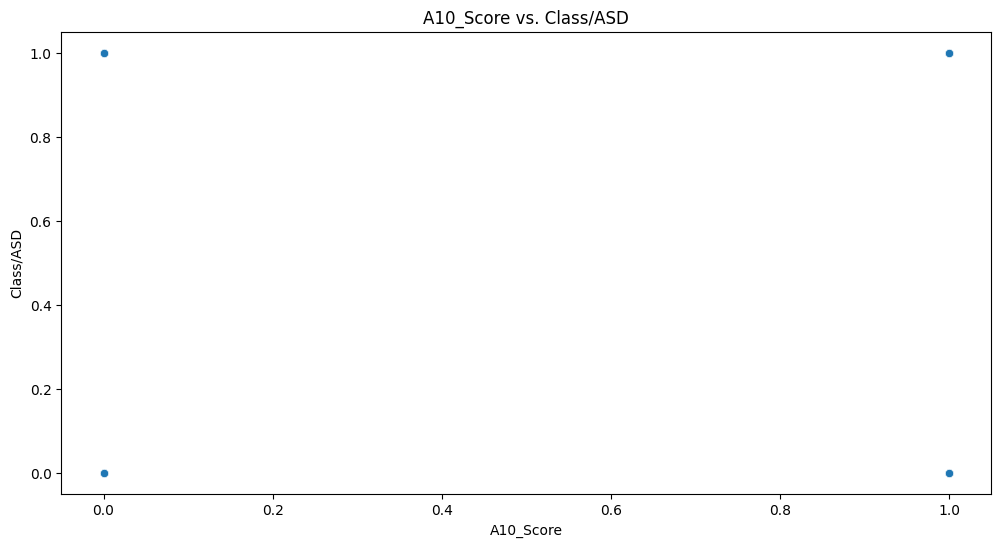

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame
# Replace 'train' with your actual DataFrame name

# Categorical features: Bar plots
categorical_features = ['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res']
for feature in categorical_features:
    plt.figure(figsize=(4, 4))
    sns.countplot(x=feature, hue='Class/ASD', data=train_balanced)
    plt.title(f'{feature} vs. Class/ASD')
    plt.xticks(rotation=45)
    plt.legend(title='Class/ASD', loc='upper right')
    plt.show()

# Numerical features: Scatter plots
numerical_features = ['age','A1_Score',
    'A2_Score',
    'A3_Score' ,
    'A4_Score',
    'A5_Score',
    'A6_Score',
    'A7_Score',
    'A8_Score',
    'A9_Score',
'A10_Score' ]
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=feature, y='Class/ASD', data=train)
    plt.title(f'{feature} vs. Class/ASD')
    plt.show()


<!-- AQ_score = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

for item in AQ_score:
    fig = px.histogram(train,
                 x=item,  
                 color='Class/ASD',
                 barmode='group',
                 histnorm='percent',
                 template='simple_white',
                 width=400, height=330,
                 color_discrete_sequence=['purple', 'salmon'],                                   
                )
    fig.update_layout(title="Distribusion of : " + item,
                      font_family="San Serif",
                      titlefont={'size': 20},
                      template='simple_white',
                      showlegend=False,
                      bargap=0.1,
                      bargroupgap=0.1
                     )
    fig.show() -->

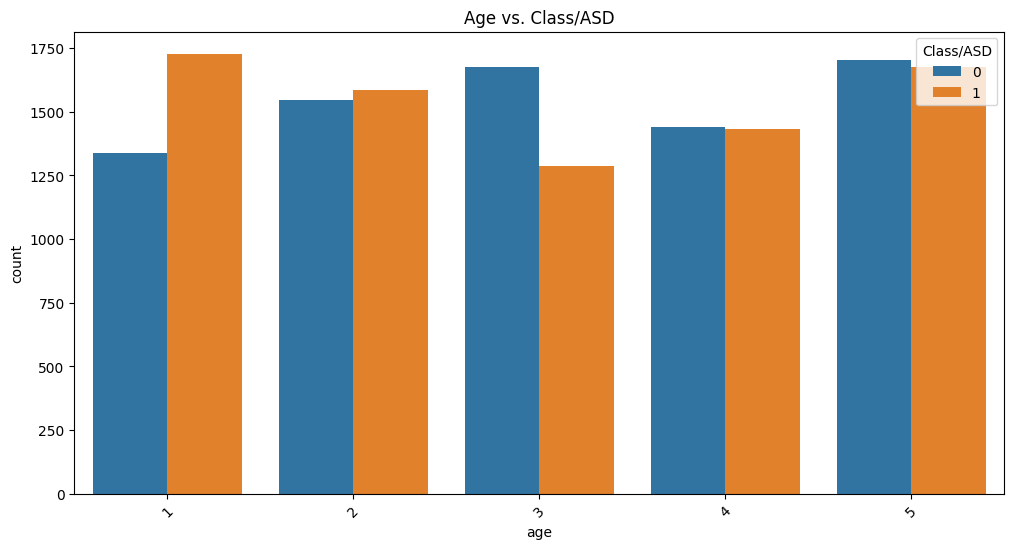

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='Class/ASD', data=train_balanced)
plt.title('Age vs. Class/ASD')
plt.xticks(rotation=45)
plt.legend(title='Class/ASD', loc='upper right')
plt.show()

### Modeling
- Build simple models such Logistic regression, SVM and Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Splitting data into train and test sets for 60:40 ratio
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X_train_balanced_df, y_train_balanced_series, test_size=0.4, random_state=42)

# Training SVM model for 60:40 split
svm_model_60 = SVC(kernel='linear')
svm_model_60.fit(X_train_60, y_train_60)

# Testing SVM model for 60:40 split
svm_predictions_60 = svm_model_60.predict(X_test_40)
svm_accuracy_60 = accuracy_score(y_test_40, svm_predictions_60)

print("SVM Accuracy for 60:40 split:", svm_accuracy_60)

# Training Logistic Regression model for 60:40 split
lr_model_60 = LogisticRegression(solver='saga', tol=1e-5, max_iter=10000, random_state=0, C=0.22685190926977272, penalty='l2')
lr_model_60.fit(X_train_60, y_train_60)

# Testing Logistic Regression model for 60:40 split
lr_predictions_60 = lr_model_60.predict(X_test_40)
lr_accuracy_60 = accuracy_score(y_test_40, lr_predictions_60)

print("Logistic Regression Accuracy for 60:40 split:", lr_accuracy_60)

# Training Naive Bayes model for 60:40 split
nb_model_60 = GaussianNB()
nb_model_60.fit(X_train_60, y_train_60)

# Testing Naive Bayes model for 60:40 split
nb_predictions_60 = nb_model_60.predict(X_test_40)
nb_accuracy_60 = accuracy_score(y_test_40, nb_predictions_60)

print("Naive Bayes Accuracy for 60:40 split:", nb_accuracy_60)


SVM Accuracy for 60:40 split: 0.865574833792768
Logistic Regression Accuracy for 60:40 split: 0.8611966920706989
Naive Bayes Accuracy for 60:40 split: 0.8590886979082212


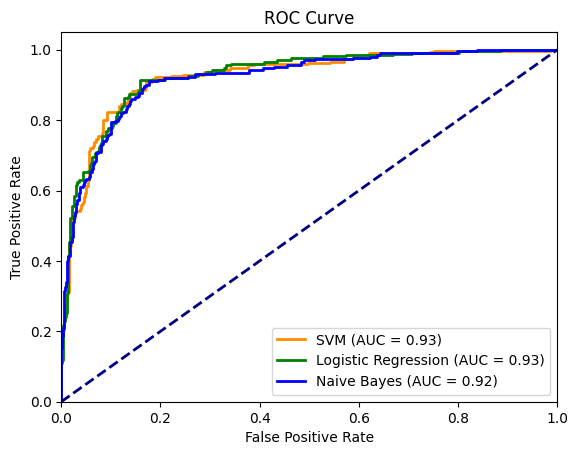

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test_40, svm_model_60.decision_function(X_test_40))
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test_40, lr_model_60.decision_function(X_test_40))
lr_roc_auc = auc(lr_fpr, lr_tpr)

# Calculate ROC curve for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test_40, nb_model_60.predict_proba(X_test_40)[:, 1])
nb_roc_auc = auc(nb_fpr, nb_tpr)

# Plot ROC curves
plt.figure()
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label='SVM (AUC = %0.2f)' % svm_roc_auc)
plt.plot(lr_fpr, lr_tpr, color='green', lw=2, label='Logistic Regression (AUC = %0.2f)' % lr_roc_auc)
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Splitting data into train and test sets for 70:30 ratio
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_train_balanced_df,
                                                                y_train_balanced_series,
                                                                test_size=0.3,
                                                                random_state=42)

# Training SVM model for 70:30 split
svm_model_70 = SVC(kernel='linear')
svm_model_70.fit(X_train_70, y_train_70)

# Testing SVM model for 70:30 split
svm_predictions_70 = svm_model_70.predict(X_test_30)
svm_accuracy_70 = accuracy_score(y_test_30, svm_predictions_70)

print("SVM Accuracy for 70:30 split:", svm_accuracy_70)

# Training Logistic Regression model for 70:30 split
lr_model_70 = LogisticRegression(solver='saga',
                                  tol=1e-5,
                                  max_iter=10000,
                                  random_state=0,
                                  C=0.22685190926977272,
                                  penalty='l2'
                                 )
lr_model_70.fit(X_train_70, y_train_70)

# Testing Logistic Regression model for 70:30 split
lr_predictions_70 = lr_model_60.predict(X_test_30)
lr_accuracy_70 = accuracy_score(y_test_30, lr_predictions_70)

print("Logistic Regression Accuracy for 70:30 split:", lr_accuracy_70)

# Training Naive Bayes model for 70:30 split
nb_model_70 = GaussianNB()
nb_model_70.fit(X_train_70, y_train_70)

# Testing Naive Bayes model for 70:30 split
nb_predictions_70 = nb_model_70.predict(X_test_30)
nb_accuracy_70 = accuracy_score(y_test_30, nb_predictions_70)

print("Naive Bayes Accuracy for 70:30 split:", nb_accuracy_70)



SVM Accuracy for 70:30 split: 0.8655135135135135
Logistic Regression Accuracy for 70:30 split: 0.8622702702702703
Naive Bayes Accuracy for 70:30 split: 0.8611891891891892


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Splitting data into train and test sets for 80:20 ratio
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_train_balanced_df,
                                                                y_train_balanced_series,
                                                                test_size=0.2,
                                                                random_state=42)

# Training SVM model for 80:20 split
svm_model_80 = SVC(kernel='linear')
svm_model_80.fit(X_train_80, y_train_80)

# Testing SVM model for 80:20 split
svm_predictions_80 = svm_model_60.predict(X_test_20)
svm_accuracy_80 = accuracy_score(y_test_20, svm_predictions_80)

print("SVM Accuracy for 80:20 split:", svm_accuracy_80)

# Training Logistic Regression model for 80:20 split
lr_model_80 = LogisticRegression(solver='saga',
                                  tol=1e-5,
                                  max_iter=10000,
                                  random_state=0,
                                  C=0.22685190926977272,
                                  penalty='l2'
                                 )
lr_model_80.fit(X_train_80, y_train_80)

# Testing Logistic Regression model for 80:20 split
lr_predictions_80 = lr_model_60.predict(X_test_20)
lr_accuracy_80 = accuracy_score(y_test_20, lr_predictions_80)

print("Logistic Regression Accuracy for 80:20 split:", lr_accuracy_80)

# Training Naive Bayes model for 80:20 split
nb_model_80 = GaussianNB()
nb_model_80.fit(X_train_80, y_train_80)

# Testing Naive Bayes model for 80:20 split
nb_predictions_80 = nb_model_60.predict(X_test_20)
nb_accuracy_80 = accuracy_score(y_test_20, nb_predictions_80)

print("Naive Bayes Accuracy for 80:20 split:", nb_accuracy_80)



SVM Accuracy for 80:20 split: 0.8628404669260701
Logistic Regression Accuracy for 80:20 split: 0.8602464332036317
Naive Bayes Accuracy for 80:20 split: 0.8628404669260701


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Training SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_balanced_df, y_train_balanced_series)

# Testing SVM model
svm_predictions = svm_model.predict(X_train_balanced_df)
svm_accuracy = accuracy_score(y_train_balanced_series, svm_predictions)


# Training Logistic Regression model
lr_model = LogisticRegression(solver='saga',
                              tol=1e-5,
                              max_iter=10000,
                              random_state=0,
                              C=0.22685190926977272,
                              penalty='l2'
                             )
lr_model.fit(X_train_balanced_df, y_train_balanced_series)

lr_predictions = lr_model.predict(X_train_balanced_df)
lr_accuracy = accuracy_score(y_train_balanced_series, lr_predictions)
print("Logistic Regression Accuracy:", svm_accuracy)
print("SVM Accuracy:", lr_accuracy)
nb_model = GaussianNB()
nb_model.fit(X_train_balanced_df, y_train_balanced_series)
nb_predictions = nb_model.predict(X_train_balanced_df)
nb_accuracy = accuracy_score(y_train_balanced_series, nb_predictions)
print("Naive Bayes Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.8621562013492475
SVM Accuracy: 0.8606642449403218
Naive Bayes Accuracy: 0.8606642449403218


In [ ]:
X_train_balanced_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res
0,0,0,0,0,0,0,0,0,0,0,4,1,2,0,0,27
1,1,0,1,1,1,1,1,1,1,1,1,1,8,1,0,58
2,1,0,0,0,1,0,0,1,1,0,4,0,3,1,0,57
3,0,0,0,0,0,0,0,1,0,0,3,1,0,1,0,56
4,0,1,0,0,0,0,0,0,0,0,5,0,4,1,0,39


In [ ]:
X_train_balanced_df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res'],
      dtype='object')

In [ ]:
X_train_balanced_df['country_of_res'].unique()

array([27, 58, 57, 56, 39, 37, 50, 45, 36,  0, 52,  6,  5, 46, 47,  9, 38,
       11, 14, 34, 23, 15,  7, 29, 51, 13, 48, 43, 31,  4, 44, 32, 60,  3,
        1, 25, 24, 59,  8, 16, 26, 35, 21, 20, 18, 54, 55, 40, 12, 33, 49,
        2, 42, 28, 22, 17, 30, 41, 10, 53, 19])

In [ ]:
X_train_balanced_df['ethnicity'].unique()

array([ 2,  8,  3,  0,  4, 10,  5,  1,  6,  7,  9])

In [ ]:
y_train_balanced_series.head()

0    0
1    1
2    0
3    0
4    0
Name: Class/ASD, dtype: int64

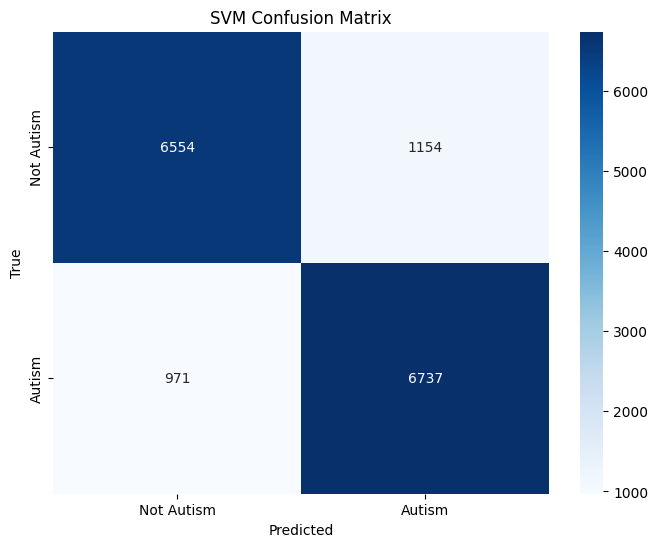

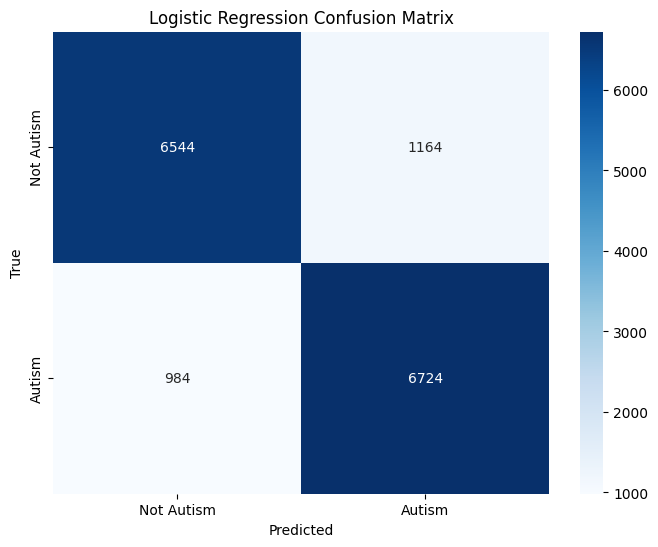

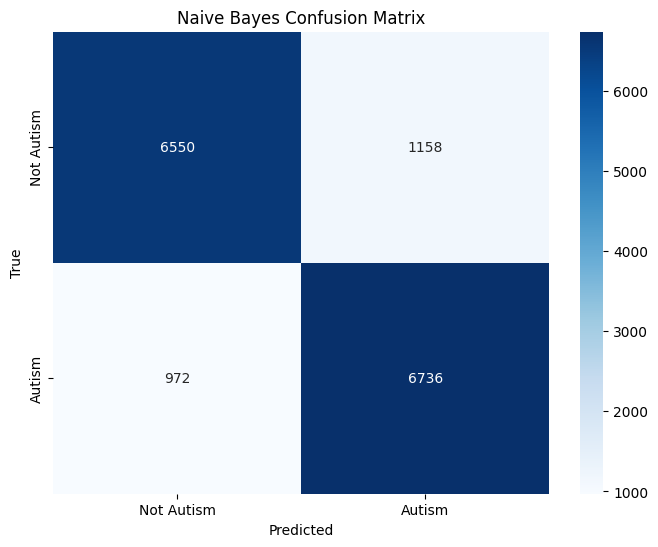

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_train_balanced_series, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Autism', 'Autism'],
            yticklabels=['Not Autism', 'Autism'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_train_balanced_series, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Autism', 'Autism'],
            yticklabels=['Not Autism', 'Autism'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion matrix for Naive Bayes
nb_conf_matrix = confusion_matrix(y_train_balanced_series, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Autism', 'Autism'],
            yticklabels=['Not Autism', 'Autism'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import pickle
# Save models as pickle files

with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model_60, f)

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model_60, f)

with open('nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model_60, f)

print("Models saved successfully!")

Models saved successfully!


In [ ]:
class SVM:
    def __init__(self, lr=0.001, n_iters=1000,threshold=0):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.threshold = threshold


    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_pred = np.dot(x_i, self.weights) + self.bias
                if y[idx] * linear_pred >= 1:
                    dw = 2 * 1 / self.n_iters * self.weights
                    db = 0
                else:
                    dw = 2 * 1 / self.n_iters * self.weights - np.dot(x_i, y[idx])
                    db = y[idx]
                self.weights -= self.lr * dw
                self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        adjusted_linear_pred = linear_pred - self.threshold
        return np.sign(adjusted_linear_pred)
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

In [ ]:

X_train_balanced_df = X_train_balanced_df.to_numpy()  # Convert DataFrame to NumPy array
y_train_balanced_series = y_train_balanced_series.to_numpy()  # Convert Series to NumPy array

In [ ]:
# Splitting data into train and test sets for 60:40 ratio
X_train, X_test, y_train, y_test = train_test_split(X_train_balanced_df,
                                                    y_train_balanced_series,
                                                    test_size=0.4,
                                                    random_state=42)

svm_model = SVM(lr=0.001, n_iters=1000,threshold=0.2)
svm_model.fit(X_train, y_train)
y_pred_60 = svm_model.predict(X_test)

acc_60_40 = accuracy(y_pred_60, y_test)
print("SVM Accuracy for 60:40 split:", acc_60_40)

SVM Accuracy for 60:40 split: 0.48937895248905466


In [ ]:
# Splitting data into train and test sets for 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_train_balanced_df,
                                                    y_train_balanced_series,
                                                    test_size=0.3,
                                                    random_state=42)

svm_model = SVM(lr=0.01, n_iters=1000,threshold=0.2)
svm_model.fit(X_train, y_train)
y_pred_70 = svm_model.predict(X_test)

acc_70_30 = accuracy(y_pred_70, y_test)
print("SVM Accuracy for 70:30 split:", acc_70_30)

SVM Accuracy for 70:30 split: 0.4562162162162162


In [ ]:
# Splitting data into train and test sets for 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_train_balanced_df,
                                                    y_train_balanced_series,
                                                    test_size=0.2,
                                                    random_state=42)

svm_model = SVM(lr=0.001, n_iters=1000,threshold=0.2)
svm_model.fit(X_train, y_train)
y_pred_80 = svm_model.predict(X_test)

acc_80_20 = accuracy(y_pred_80, y_test)
print("SVM Accuracy for 80:20 split:", acc_80_20)

SVM Accuracy for 80:20 split: 0.48573281452658884


In [ ]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


clf = LogisticRegression(lr=0.01)
clf.fit(X_train_balanced_df,y_train_balanced_series)
y_pred_scratch = clf.predict(X_train_balanced_df)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_train_balanced_series)/len(y_train_balanced_series)

acc = accuracy(y_pred_scratch, y_train_balanced_series)
print(acc)

0.6735858847950181


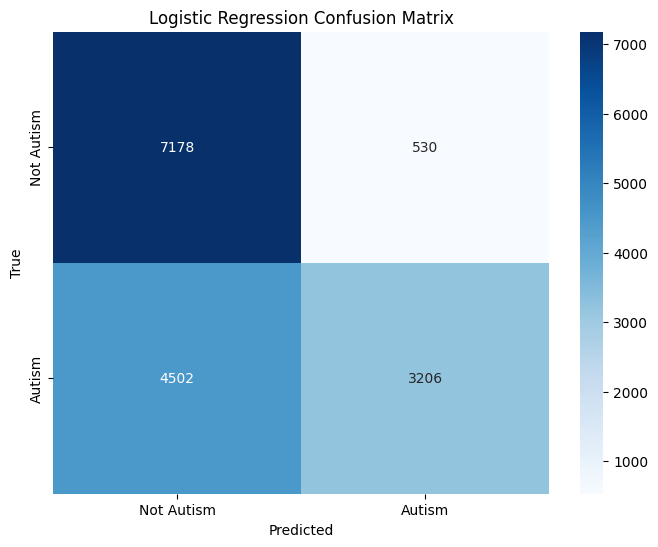

In [ ]:
# Confusion matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
lr_conf_matrix = confusion_matrix(y_train_balanced_series, y_pred_scratch)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Autism', 'Autism'],
            yticklabels=['Not Autism', 'Autism'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()